In [ ]:
import pandas as pd
import numpy as np
from six.moves import cPickle as pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 50}


plt.rc('font', **font)
matplotlib.style.use('ggplot')
%matplotlib inline
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",101)
pd.set_option("display.max_colwidth",5000)

/home/thakursc1/anaconda3/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [ ]:
l = pd.read_csv('final.csv')
df = pd.read_csv('attributes.csv')

# Customer Demographic Analysis

So we will seperate out customer demographic data and understand his or her background and analyze the loans respectively 

In [5]:
"""l.columns.values"""

'l.columns.values'

In [6]:
# Seperating customer centric attributes
cus_att = ['id',
           'member_id',
           'loan_amnt',
           'funded_amnt',
           'emp_length',
           'home_ownership',
           'annual_inc',
           'loan_status',
           'purpose','title',
          'zip_code',
           'addr_state',
           'open_acc',
           'application_type']

In [7]:
cust_df = l[cus_att]
cust_df.to_csv('cust.csv')

# What kind of cutomers take more than one loans ?

In [8]:
cust_df = pd.read_csv('cust.csv',index_col=0)
cust_df

,id,member_id,loan_amnt,funded_amnt,emp_length,home_ownership,annual_inc,loan_status,purpose,title,zip_code,addr_state,open_acc,application_type
0,1077501,1296599,5000,5000,10+ years,RENT,24000.00,Fully Paid,credit_card,Computer,860xx,AZ,3,INDIVIDUAL
1,1077430,1314167,2500,2500,< 1 year,RENT,30000.00,Charged Off,car,bike,309xx,GA,3,INDIVIDUAL
2,1077175,1313524,2400,2400,10+ years,RENT,12252.00,Fully Paid,small_business,real estate business,606xx,IL,2,INDIVIDUAL
3,1076863,1277178,10000,10000,10+ years,RENT,49200.00,Fully Paid,other,personel,917xx,CA,10,INDIVIDUAL
4,1075358,1311748,3000,3000,1 year,RENT,80000.00,Current,other,Personal,972xx,OR,15,INDIVIDUAL
5,1075269,1311441,5000,5000,3 years,RENT,36000.00,Fully Paid,wedding,My wedding loan I promise to pay back,852xx,AZ,9,INDIVIDUAL
6,1069639,1304742,7000,7000,8 years,RENT,47004.00,Current,debt_consolidation,Loan,280xx,NC,7,INDIVIDUAL
7,1072053,1288686,3000,3000,9 years,RENT,48000.00,Fully Paid,car,Car Downpayment,900xx,CA,4,INDIVIDUAL
8,1071795,1306957,5600,5600,4 years,OWN,40000.00,Charged Off,small_business,Expand Business & Buy Debt Portfolio,958xx,CA,11,INDIVIDUAL
9,1071570,1306721,5375,5375,< 1 year,RENT,15000.00,Charged Off,other,Building my credit history.,774xx,TX,2,INDIVIDUAL


In [9]:
print("number of customers ",cust_df.member_id.value_counts().shape)
print("number of loans",cust_df.id.value_counts().shape)
## looks like all customers have only one loan 
### Removing emp_length non available items
cust_df1 = cust_df[~(cust_df.emp_length=='n/a')]
cust_df1.shape

cust_dist  = cust_df1.groupby(['emp_length','loan_status'])['loan_status'].count().unstack('emp_length')
charged_off = cust_df1.groupby(['emp_length','loan_status'])['emp_length'].count().unstack('loan_status')['Charged Off']

number of customers  (869041,)
number of loans (869041,)


/home/thakursc1/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


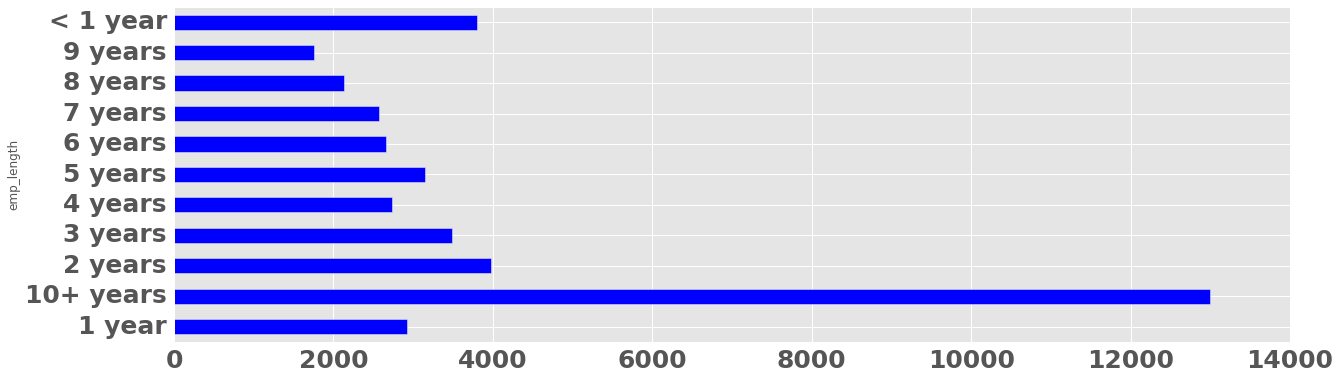

In [10]:
## Plotting above data
charged_off.plot(kind='barh',figsize=(20,6),fontsize=25)
## A person is very likely to default if he has 10+ years of experience
## There is a significant 


/home/thakursc1/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


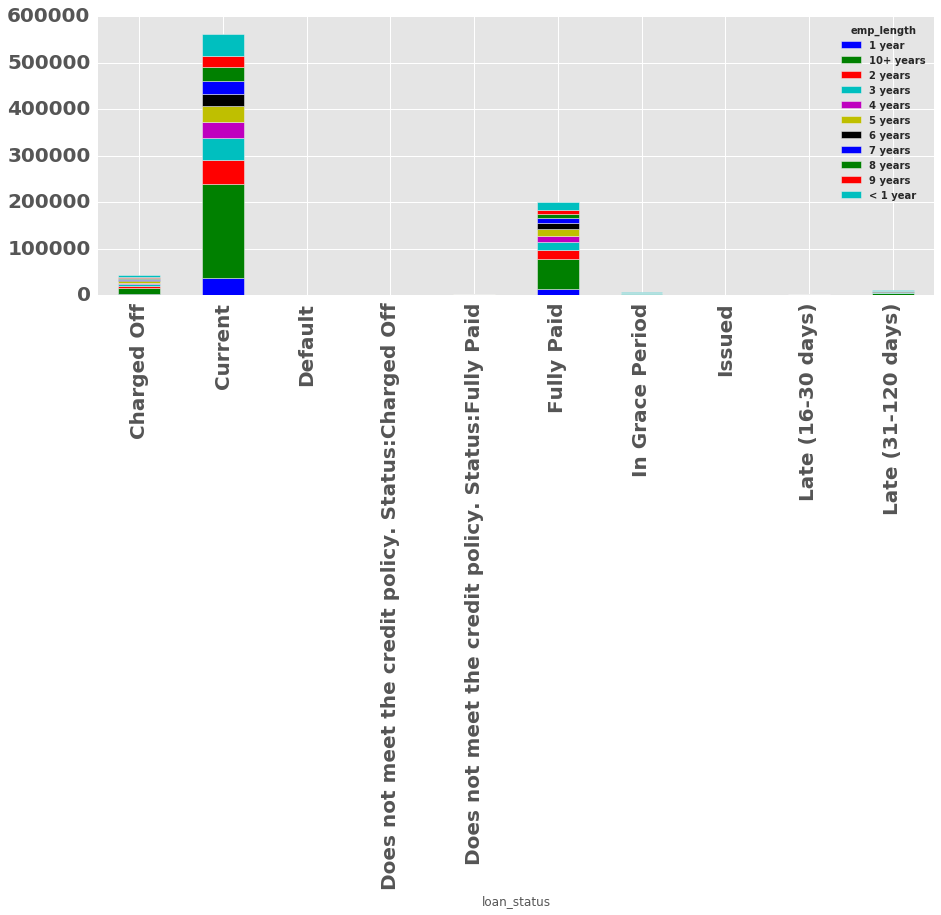

In [11]:
cust_dist.plot(kind='bar',stacked=True,figsize=(15,5),fontsize=20)

## As we can clearly if a person is either 1 year experienced or 10 years + experienced he is very likely to have issued a loan 


In [12]:
cust_dist  = cust_df1.groupby(['home_ownership','loan_status'])['loan_status'].count().unstack('home_ownership')
charged_off = cust_df1.groupby(['home_ownership','loan_status'])['home_ownership'].count().unstack('loan_status')['Charged Off']

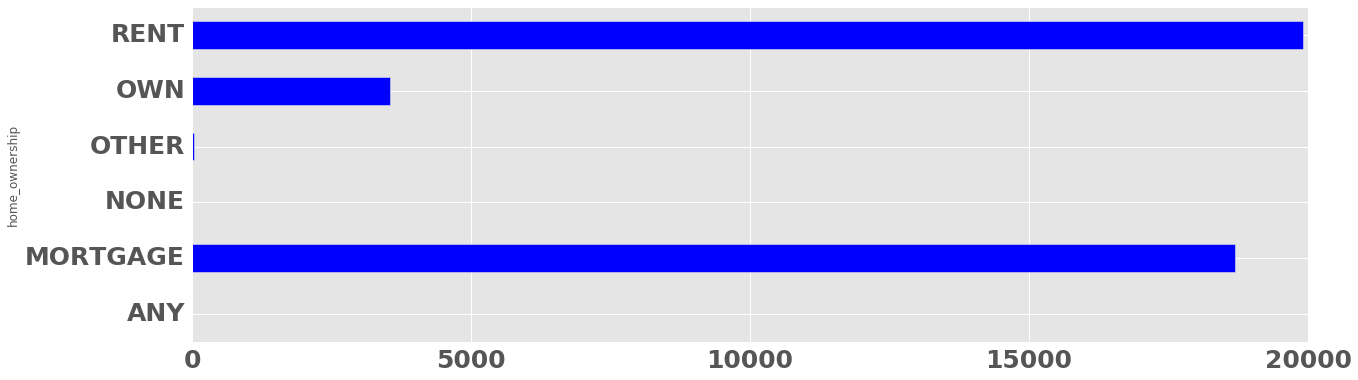

In [13]:
# defines no. of loans charged of per category of home_ownership 
charged_off.plot(kind='barh',figsize=(20,6),fontsize=25)
#Clearly if a house is on rent or morgage its more likely to charge off 

/home/thakursc1/anaconda3/lib/python3.4/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family ['normal'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


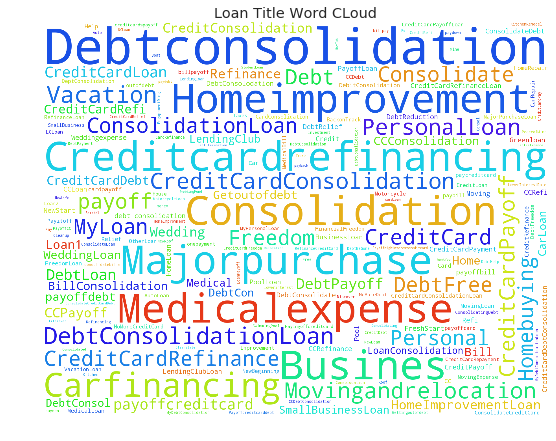

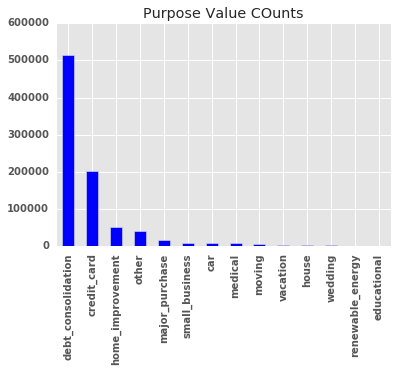

In [14]:
text = list(cust_df.title)
t = []
for i in text:
    t.append("".join(i.split()))
t = " ".join(t)
wc = WordCloud(background_color="white",
               stopwords=STOPWORDS.add('loan'),width=1800,
                      height=1400,margin=10)
# generate word cloud
wc = wc.generate(t)
# show
fig2 = plt.figure(figsize = (20,10)) # create a 5 x 5 figure 
ax3 = fig2.add_subplot(121)
ax3.imshow(wc)
ax3.set_title('Loan Title Word CLoud')
plt.axis("off")
plt.show()

fig2.add_subplot(121)
cust_df.purpose.value_counts().plot(kind="bar")
plt.title("Purpose Value COunts")

### I guess the word cloud says all of it

# Cases Where Funded_amnt is less then Loan_amnt


In [15]:
df = l[(cust_df.funded_amnt<cust_df.loan_amnt)]
not_df = l[~(cust_df.funded_amnt<cust_df.loan_amnt)]
df = df.drop("Unnamed: 0",axis=1)
print(df.shape)
print(df.columns.values)
### SO there are 2000 occurance where funded amnt is less then emp_amnt

(2055, 48)
['id' 'member_id' 'loan_amnt' 'funded_amnt' 'funded_amnt_inv' 'term'
 'int_rate' 'installment' 'grade' 'sub_grade' 'emp_length' 'home_ownership'
 'annual_inc' 'verification_status' 'issue_d' 'loan_status' 'pymnt_plan'
 'url' 'purpose' 'title' 'zip_code' 'addr_state' 'dti' 'delinq_2yrs'
 'earliest_cr_line' 'inq_last_6mths' 'open_acc' 'pub_rec' 'revol_bal'
 'revol_util' 'total_acc' 'initial_list_status' 'out_prncp' 'out_prncp_inv'
 'total_pymnt' 'total_pymnt_inv' 'total_rec_prncp' 'total_rec_int'
 'total_rec_late_fee' 'recoveries' 'collection_recovery_fee' 'last_pymnt_d'
 'last_pymnt_amnt' 'last_credit_pull_d' 'collections_12_mths_ex_med'
 'policy_code' 'application_type' 'acc_now_delinq']


In [16]:
print(not_df.shape)

(866986, 49)


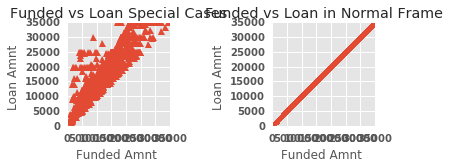

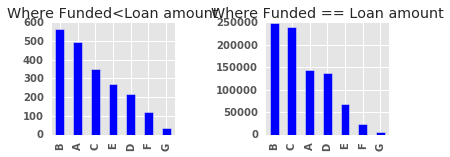

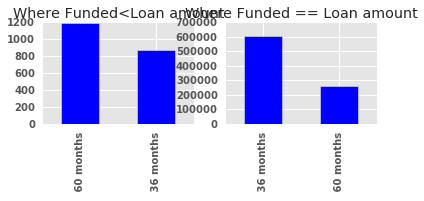

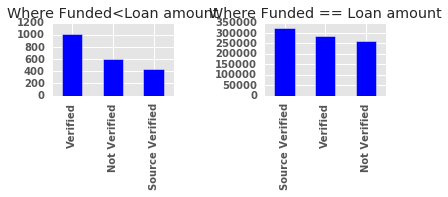

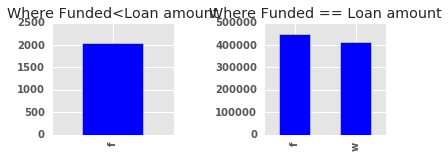

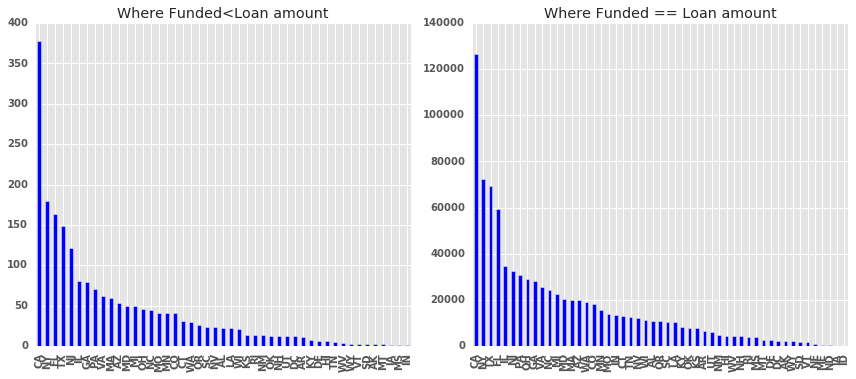

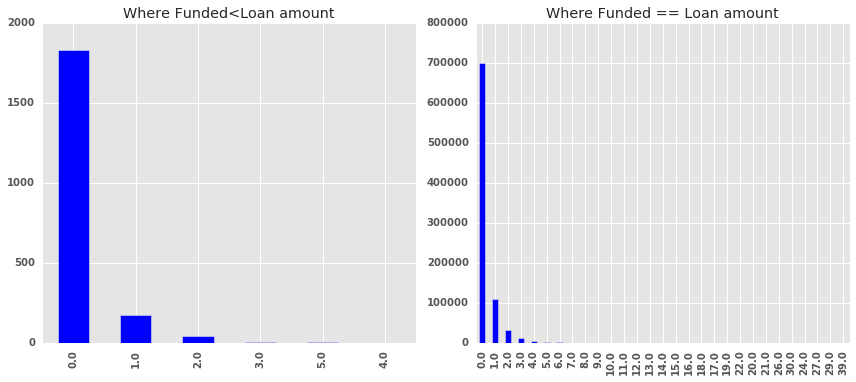

In [17]:
#graph for data where funded_amnt<loan_amnt 
fig = plt.figure()
plt.subplot2grid((2,2),(0,0))
plt.plot(df.funded_amnt,df.loan_amnt,'^')
plt.xlabel("Funded Amnt ")
plt.ylabel("Loan Amnt ")
plt.title("Funded vs Loan Special Cases")

## Graph for data where funded amount is equal to loan_amnt
plt.subplot2grid((2,2),(0,1))
plt.plot(not_df.funded_amnt,not_df.loan_amnt,'.')
plt.xlabel("Funded Amnt ")
plt.ylabel("Loan Amnt ")
plt.title("Funded vs Loan in Normal Frame")

fig.tight_layout()


fig = plt.figure()
plt.subplot2grid((2,2),(0,0))
df.grade.value_counts().plot(kind='bar')
plt.title("Where Funded<Loan amount")


## Graph for data where funded amount is equal to loan_amnt
plt.subplot2grid((2,2),(0,1))
not_df.grade.value_counts().plot(kind='bar')
plt.title("Where Funded == Loan amount")

fig.tight_layout()

fig = plt.figure()
plt.subplot2grid((2,2),(0,0))
df.term.value_counts().plot(kind='bar')
plt.title("Where Funded<Loan amount")

## Graph for data where funded amount is equal to loan_amnt
plt.subplot2grid((2,2),(0,1))
not_df.term.value_counts().plot(kind='bar')
plt.title("Where Funded == Loan amount")

fig = plt.figure()
plt.subplot2grid((2,2),(0,0))
df.verification_status.value_counts().plot(kind='bar')
plt.title("Where Funded<Loan amount")

## Graph for data where funded amount is equal to loan_amnt
plt.subplot2grid((2,2),(0,1))
not_df.verification_status.value_counts().plot(kind='bar')
plt.title("Where Funded == Loan amount")

fig.tight_layout()


fig = plt.figure()
plt.subplot2grid((2,2),(0,0))
df.initial_list_status.value_counts().plot(kind='bar')
plt.title("Where Funded<Loan amount")

## Graph for data where funded amount is equal to loan_amnt
plt.subplot2grid((2,2),(0,1))
not_df.initial_list_status.value_counts().plot(kind='bar')
plt.title("Where Funded == Loan amount")

fig.tight_layout()



fig = plt.figure(figsize=(12,10))
plt.subplot2grid((2,2),(0,0))
df.addr_state.value_counts().plot(kind='bar')
plt.title("Where Funded<Loan amount")

## Graph for data where funded amount is equal to loan_amnt
plt.subplot2grid((2,2),(0,1))
not_df.addr_state.value_counts().plot(kind='bar')
plt.title("Where Funded == Loan amount")

fig.tight_layout()



fig = plt.figure(figsize=(12,10))
plt.subplot2grid((2,2),(0,0))
df.delinq_2yrs.value_counts().plot(kind='bar')
plt.title("Where Funded<Loan amount")

## Graph for data where funded amount is equal to loan_amnt
plt.subplot2grid((2,2),(0,1))
not_df.delinq_2yrs.value_counts().plot(kind='bar')
plt.title("Where Funded == Loan amount")

fig.tight_layout()



In [18]:
df.issue_d = pd.to_datetime(df.issue_d)
df["Year"]= df.issue_d.dt.year
not_df.issue_d = pd.to_datetime(not_df.issue_d)
not_df['Year'] = not_df.issue_d.dt.year

/home/thakursc1/anaconda3/lib/python3.4/site-packages/pandas/core/generic.py:2177: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/home/thakursc1/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


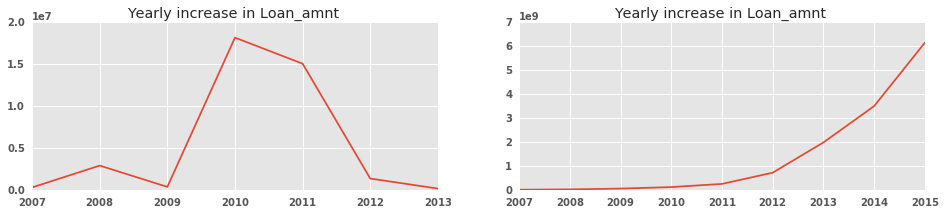

In [19]:
fig= plt.figure(figsize=(16,3))

plt.subplot2grid((1,2),(0,0))
year_grp = df.groupby('Year').sum()
plt.plot(year_grp.index,year_grp.loan_amnt.values)
plt.xticks(year_grp.index,year_grp.index)
plt.title("Yearly increase in Loan_amnt ")

plt.subplot2grid((1,2),(0,1))
year_grp = not_df.groupby('Year').sum()
plt.plot(year_grp.index,year_grp.loan_amnt.values)
plt.xticks(year_grp.index,year_grp.index)
plt.title("Yearly increase in Loan_amnt ")


### Looks like bank had very strict regulation in funding_amnt from 2009 to 2012 
##it got linient with the rules by 2012 although its loan _amnt kept on increasing throughout 

# Is the less sanctioned funded amnt directly related to purpose 

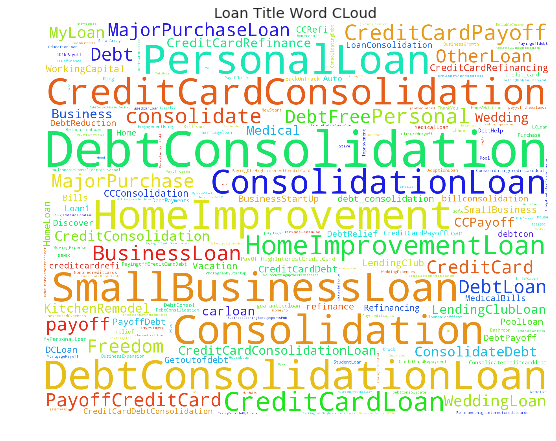

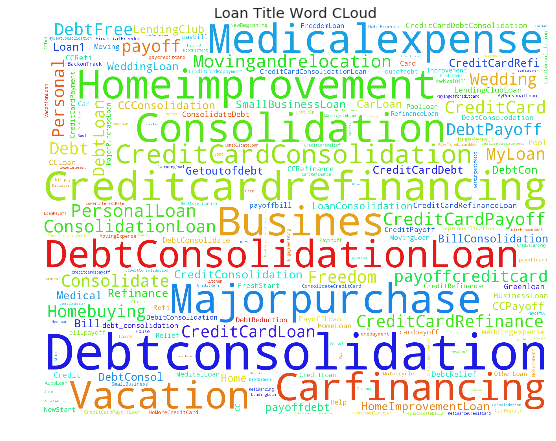

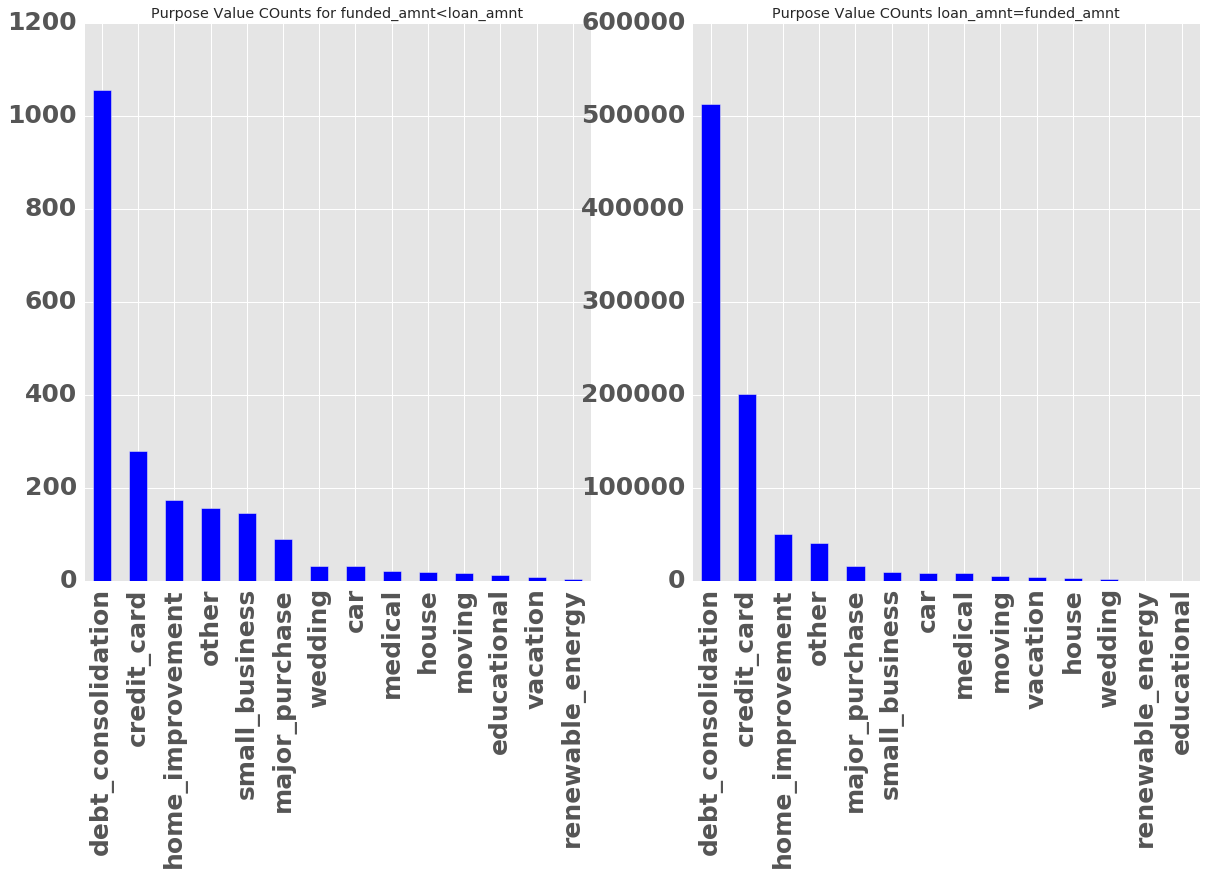

In [34]:
text = list(df.title)
t = []
for i in text:
    t.append("".join(i.split()))
t = " ".join(t)
wc = WordCloud(background_color="white",
               stopwords=STOPWORDS.add('loan'),width=1800,
                      height=1400,margin=10)
# generate word cloud
wc = wc.generate(t)
# show
fig2 = plt.figure(figsize = (20,10)) # create a 5 x 5 figure 
ax3 = fig2.add_subplot(121)
ax3.imshow(wc)
ax3.set_title('Loan Title Word CLoud')
plt.axis("off")
plt.show()

### I guess the word cloud says all of it

text = list(not_df.title)
t = []
for i in text:
    t.append("".join(i.split()))
t = " ".join(t)
wc = WordCloud(background_color="white",
               stopwords=STOPWORDS.add('loan'),width=1800,
                      height=1400,margin=10)
# generate word cloud
wc = wc.generate(t)
# show


fig2 = plt.figure(figsize = (20,10)) # create a 5 x 5 figure 
ax3 = fig2.add_subplot(121)
ax3.imshow(wc)
ax3.set_title('Loan Title Word CLoud')
plt.axis("off")
plt.show()


fig2 = plt.figure(figsize = (20,10)) # create a 5 x 5 figure
fig2.add_subplot(121)
df.purpose.value_counts().plot(kind="bar",fontsize=25)
plt.title("Purpose Value COunts for funded_amnt<loan_amnt")

fig2.add_subplot(122)
not_df.purpose.value_counts().plot(kind="bar",fontsize=25)
plt.title("Purpose Value COunts loan_amnt=funded_amnt")



### There is no differece observed here as well 

# Calculating Break Even Interest Rate

In [121]:
paid = l[(l['loan_status']=='Fully Paid') | (l['loan_status']=='Does not meet the credit policy. Status:Fully Paid')]
not_paid = l[(l['loan_status']=='Charged Off')|(l['loan_status']=='Does not meet the credit policy. Status:Charged Off') | (l['loan_status']=='Default') ]

In [122]:
mean_amnt = paid.loan_amnt.mean()
print("Mean amnt:",mean_amnt)

mean_int_rate = paid.int_rate.mean()
print("Mean int_rate:",mean_int_rate)

mean_term  = paid.term.mean()
print("Mean term:",mean_term)

profit = paid.loan_amnt*paid.int_rate*paid.term/100
profit = profit.sum()
print("Profit:",profit)

Mean amnt: 13310.703814067208
Mean int_rate: 13.280830193561567
Mean term: 40.62089021961807
Profit: 17083515263.99965


In [126]:
##Getting mean Loss
lmean_amnt = not_paid.loan_amnt.mean()
print("Lmean_amnt:", lmean_amnt)


lmean_amnt_rec = not_paid.total_pymnt.mean()
print("Recovereded amnt",lmean_amnt_rec)

loss  = not_paid.loan_amnt - not_paid.total_pymnt
loss = loss.sum()
print("Loss",loss)

Lmean_amnt: 14527.231759656652
Recovereded amnt 6399.115408847944
Loss 378770221.9476852


In [127]:
# So to break even our net profit loss should be 0
offset_amnt  = profit - loss
mean_profit = offset_amnt/
print("Extra Profit: ",offset_amnt)
print("Mean Profit:" )

Extra Profit:  16704745042.051964
